###  print out structures

In [1]:
import random
import numpy as np
import pprint
from graphviz import Digraph

from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP
from mycrograd_debug.drawviz_debug import draw_dot, draw_nn, print_my_params

np.random.seed(1337)
random.seed(1337)
pp = pprint.PrettyPrinter(indent=4)

#### Multi Layer Perceptron 1-2-1

In [2]:
# initialize a model
nin = 3  # number of inputs
nout = 1  # number of outputs
Value.value_counter = 0

model = MLP(
    nin, [4, 4, nout], lastReLU=False, weightsinit=2, debug_bw=True
)  # 2-layer neural network
# print("parameters")
# pp.pprint(model.parameters())
# print_my_params(model)
print("layers")
pp.pprint(model.layers)
print(model.layers[0].layernumber)

xinumbers = list(range(1, 1 + nin))
xinput = [Value(x, type="i%s" % index) for index, x in enumerate(xinumbers, start=1)]
print("inputs")
pp.pprint(xinput)

activation = model(xinput)
# activation.backward()
print("activation", activation)

Module nn MLP: structure
[3, 4, 4, 1]
3
layers
[   Layer of [LinearNeuron(3), LinearNeuron(3), LinearNeuron(3), LinearNeuron(3)],
    Layer of [LinearNeuron(4), LinearNeuron(4), LinearNeuron(4), LinearNeuron(4)],
    Layer of [LinearNeuron(4)]]
L1
inputs
[   Value(name=v042,layernumber=,neuronnumber=,weightnumber=,type=i1,data=1, grad=0),
    Value(name=v043,layernumber=,neuronnumber=,weightnumber=,type=i2,data=2, grad=0),
    Value(name=v044,layernumber=,neuronnumber=,weightnumber=,type=i3,data=3, grad=0)]
activation Value(name=v108,layernumber=O,neuronnumber=N1,weightnumber=,type=a,data=77.49000000000004, grad=0)


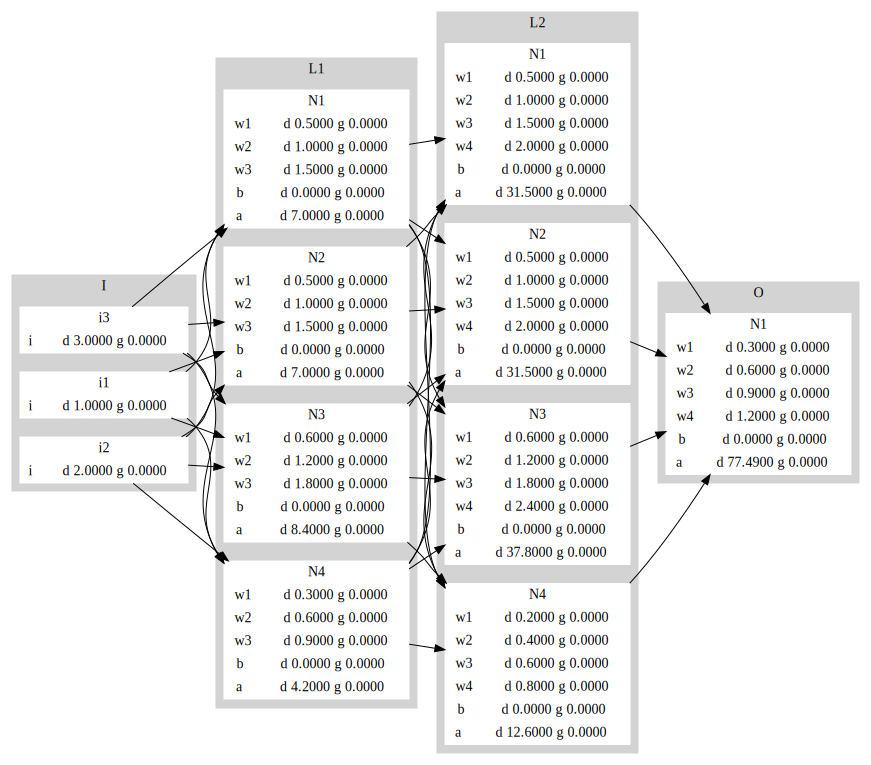

In [3]:
draw_nn(xinput, model)

backward mul   v037   0.00 ->  31.50 v076   0.00 ->   0.30
backward mul   v020   0.00 ->   1.26 v068   0.00 ->   0.60
backward mul   v019   0.00 ->   2.52 v062   0.00 ->   0.45
backward mul   v017   0.00 ->   2.10 v050   0.00 ->   0.15
backward mul   v018   0.00 ->   2.10 v056   0.00 ->   0.30
backward mul   v038   0.00 ->  31.50 v084   0.00 ->   0.60
backward mul   v022   0.00 ->   4.20 v050   0.15 ->   0.45
backward mul   v023   0.00 ->   4.20 v056   0.30 ->   0.90
backward mul   v024   0.00 ->   5.04 v062   0.45 ->   1.35
backward mul   v025   0.00 ->   2.52 v068   0.60 ->   1.80
backward mul   v039   0.00 ->  37.80 v092   0.00 ->   0.90
backward mul   v027   0.00 ->   6.30 v050   0.45 ->   0.99
backward mul   v028   0.00 ->   6.30 v056   0.90 ->   1.98
backward mul   v029   0.00 ->   7.56 v062   1.35 ->   2.97
backward mul   v030   0.00 ->   3.78 v068   1.80 ->   3.96
backward mul   v040   0.00 ->  12.60 v100   0.00 ->   1.20
backward mul   v035   0.00 ->   5.04 v068   3.96 ->   4.

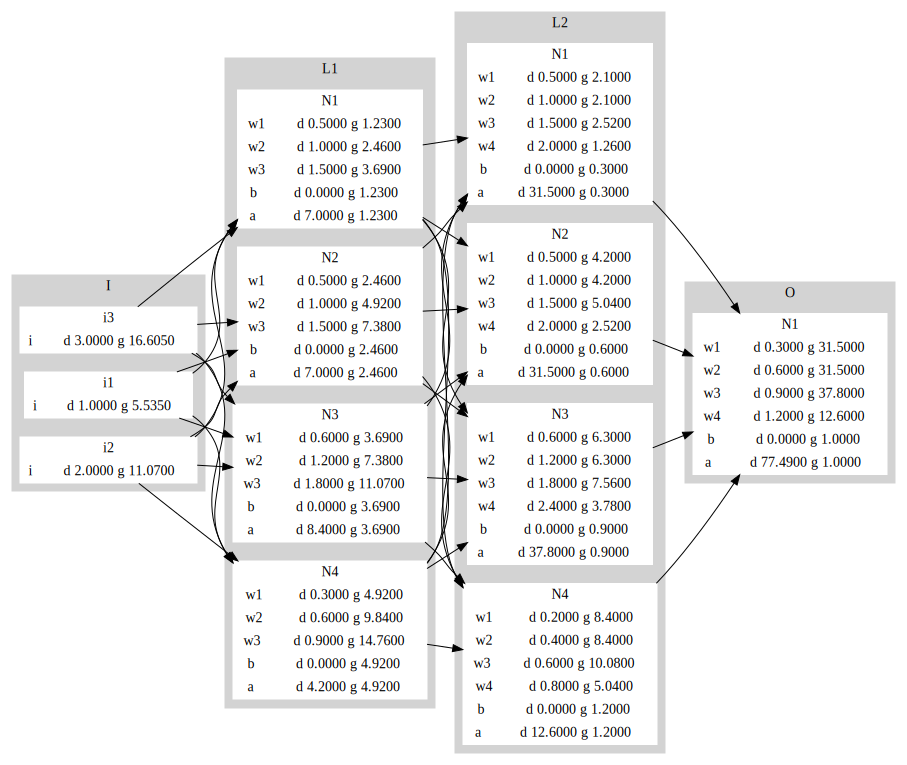

In [4]:
activation.backward()
draw_nn(xinput, model)

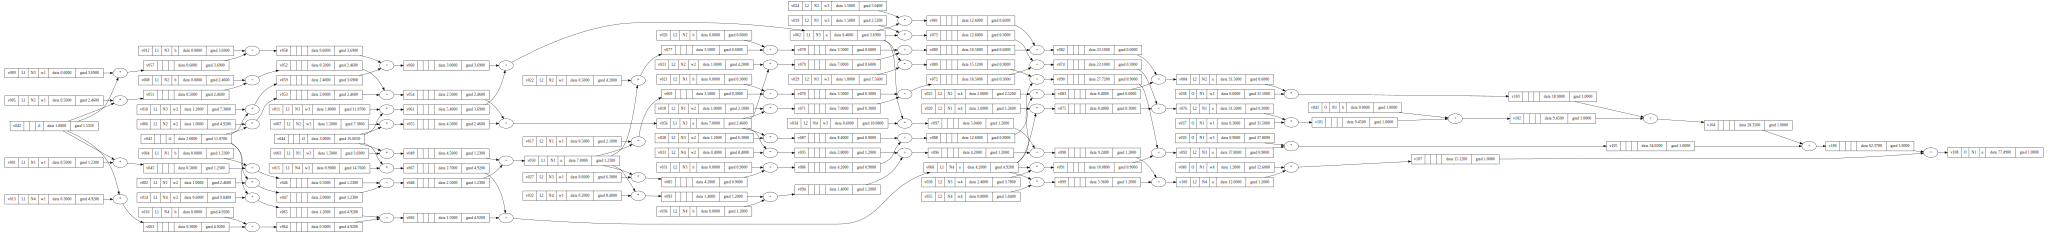

In [5]:
draw_dot(activation)